In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 100
std = 0.4

Apple_width = np.random.normal(6, std, N)
Apple_length = np.random.normal(6, std, N)

Benanas_width = np.random.normal(4, std, N)
Benanas_length = np.random.normal(8, std, N)

In [3]:
width = np.concatenate((Apple_width, Benanas_width))
length = np.concatenate((Apple_length, Benanas_length))

In [4]:
X = np.array([width, length]).T
Apple_lable = np.zeros(N, dtype = 'int') 
Benanas_lable = np.ones(N, dtype = 'int')

In [5]:
Y = np.concatenate((Apple_lable,Benanas_lable))

Text(0, 0.5, 'Length')

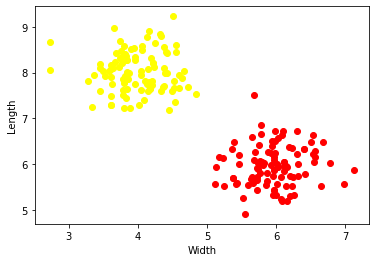

In [6]:
fig = plt.figure()
plt.scatter(X[0:N , 0] , X[0:N , 1] ,  c = 'RED')
plt.scatter(X[N: ,0] , X[N: ,1]  , c = 'yellow')
plt.xlabel('Width')
plt.ylabel('Length')

In [7]:
class kNearestNeighbors(): 


    def __init__(self, k):
        self.k = k 


    def fit(self, X_train , Y_train): 
        self.X_train = X_train
        self.Y_train = Y_train
        self.number_classes = len(np.unique(Y_train))


    def nearNeighbors(self , X_test):
        dist = np.sqrt(np.sum((X_test - self.X_train)**2 ,axis=1))
        near_neighbors = np.argsort(dist)[:self.k]
        print(near_neighbors)
        print(self.Y_train[near_neighbors])
        print(np.bincount(self.Y_train[near_neighbors]))
        return near_neighbors

        
    def predict (self, X_test):
        near_neighbors = self.nearNeighbors(X_test)
        y = np.argmax(np.bincount(self.Y_train[near_neighbors]))
        return y

In [8]:
knn = kNearestNeighbors(k=5)
knn.fit(X,Y)

In [9]:
new_fruit = np.array([4.7 , 6.8])
y_pred = knn.predict(new_fruit)
friut = { 0 : 'موز' , 
          1: 'سیب'}
print(friut[y_pred])

[196 115 127  83   2]
[1 1 1 0 0]
[2 3]
سیب
